In [3]:
## load this image datasets
import tensorflow as tf

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# download datasets
!kaggle datasets download -d 'masoudnickparvar/brain-tumor-mri-dataset'

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 83% 124M/149M [00:00<00:00, 1.29GB/s]
100% 149M/149M [00:00<00:00, 1.20GB/s]


In [6]:
## unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-mri-dataset.zip', 'r')
zip_ref.extractall('/content/data')
zip_ref.close()

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Training',
                                                       image_size=(256, 256))

val_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Testing',
                                                     image_size=(256, 256))

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [8]:
labels = train_ds.class_names
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [9]:
labels = []
for image, label in train_ds.as_numpy_iterator():
  labels.append(label)

In [10]:
ls = []
for i in labels:
  for j in i:
    ls.append(j)

In [11]:
import numpy as np
import pandas as pd

arr = np.array(ls)
pd.DataFrame(arr).value_counts()

## there is no imballencing

,count
0,
2,1595
3,1457
1,1339
0,1321


In [12]:
train_ds.as_numpy_iterator().next()[0].shape

(32, 256, 256, 3)

In [13]:
num_of_class = len(np.unique(train_ds.as_numpy_iterator().next()[1]))

In [14]:
from tensorflow import keras
## trian the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

In [15]:
## trian the model

model = Sequential([
    Conv2D(64, kernel_size=(3,3), strides=2, activation='relu', padding='valid',input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(128, (3,3), strides=2, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Conv2D(256, (3,3), strides=2, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),


    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(num_of_class, activation='softmax', kernel_initializer="glorot_uniform")

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# ## trian the model
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# model = Sequential([
#     Conv2D(32, kernel_size=(3,3), strides=2, activation='relu', padding='valid',input_shape=(256, 256, 3)),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Conv2D(64, (3,3), strides=2, padding='valid',activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Conv2D(128, (3,3), strides=2, padding='valid',activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.4),

#     Flatten(),
#     Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
#     Dropout(0.4),
#     Dense(num_of_class, activation='softmax', kernel_initializer="glorot_uniform")

# ])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 127, 127, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 31, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,006,052 (3.84 MB)

 Trainable params: 1,005,156 (3.83 MB)

 Non-trainable params: 896 (3.50 KB)

In [18]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [19]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("BtrainTumorCNNModel.keras", save_best_only=True)

In [21]:
earlystoping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [22]:
## fit and train the model
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[earlystoping_cb])

Epoch 1/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 113ms/step - accuracy: 0.3226 - loss: 2.7012 - val_accuracy: 0.5454 - val_loss: 1.8406
Epoch 2/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.5412 - loss: 1.7586 - val_accuracy: 0.6285 - val_loss: 1.5528
Epoch 3/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.6180 - loss: 1.5440 - val_accuracy: 0.6789 - val_loss: 1.3357
Epoch 4/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.6829 - loss: 1.3599 - val_accuracy: 0.6873 - val_loss: 1.2919
Epoch 5/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.7320 - loss: 1.1925 - val_accuracy: 0.7590 - val_loss: 1.0725
Epoch 6/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.7423 - loss: 1.1076 - val_accuracy: 0.7605 - val_loss: 0.9900
Epoch 7/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.7532 - loss: 1.0406 - val_accuracy: 0.7750 - val_loss: 0.9001
Epoch 8/30
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - accuracy: 0.7905 - loss: 0.9365 - v

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

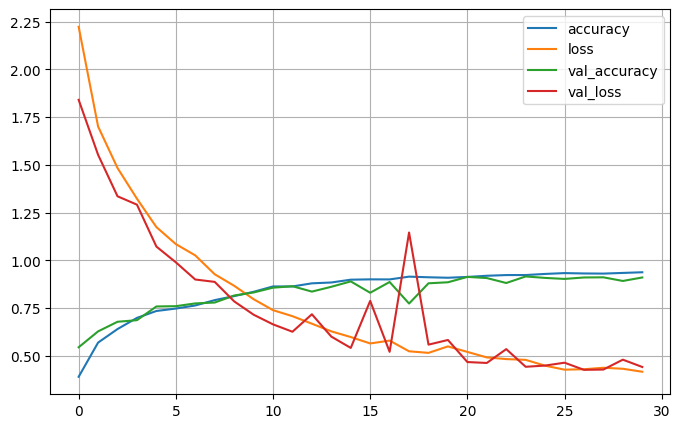

In [24]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

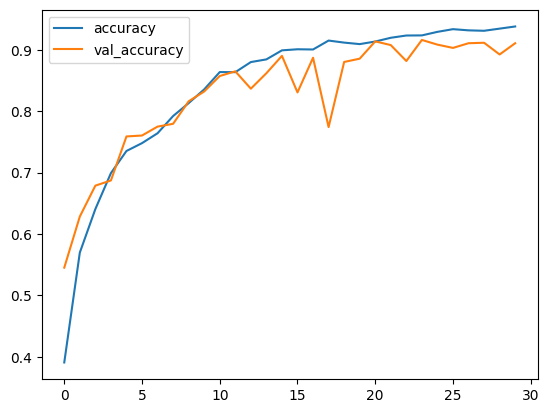

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

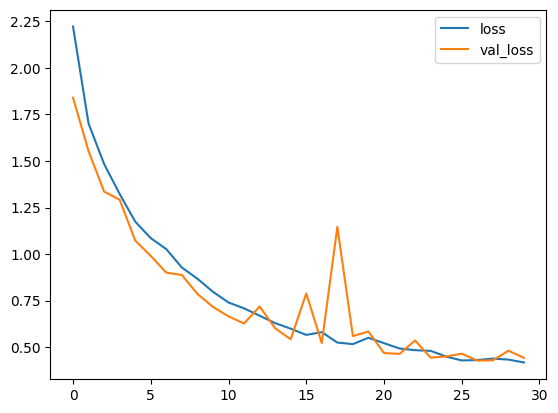

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [27]:
## test the model
test_ds = tf.keras.utils.image_dataset_from_directory('/content/data/Testing',
                                                       image_size=(256, 256))

Found 1311 files belonging to 4 classes.


In [28]:
batch = test_ds.as_numpy_iterator().next()

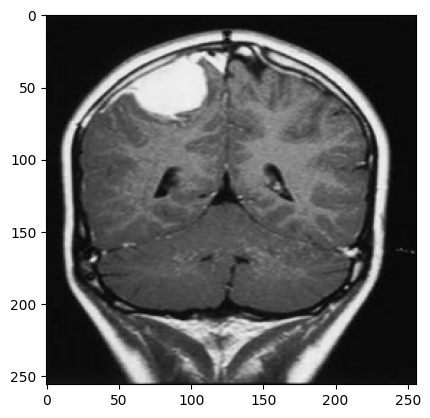

In [29]:
img = batch[0][1]
img_label = batch[1][1]
plt.imshow(img.astype(int))
plt.show()

In [30]:
image = tf.image.resize(img, (256, 256))
image = tf.expand_dims(image, 0)

In [31]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [32]:
prediction = model.predict(image)
index = np.argmax(prediction)
print(f"Predicted: {labels[index]}")
print(f"Actual: {labels[img_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: notumor
Actual: meningioma


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
model.save(f'/content/drive/MyDrive/BrainTumorNew/brainTumorMRIClassificationModel-v1.keras')

In [37]:
loss, accu = model.evaluate(test_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9054 - loss: 0.4374


In [38]:
print(f"Accuracy:{accu:.2f}%")

Accuracy:0.91%
